In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('./datasets/StudentPerformanceFactors.csv')
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [112]:
df.shape

(6607, 20)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [114]:
df['Exam_Score']=df['Exam_Score'].astype('float64')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

In [116]:
df.isnull().sum() #Since there are no null values in Hours_Studied and Exam_Score which are dependent and independent variables for                 #our model no need to fill nan values for other columns which are not used

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [117]:
numeric_columns=df.describe()
corr=numeric_columns.corr()
corr

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,0.999966,0.999990,0.999973,0.999989,0.999989,0.999968
Attendance,0.999966,1.000000,0.999945,0.999998,0.999938,0.999939,0.999996
Sleep_Hours,0.999990,0.999945,1.000000,0.999948,1.000000,1.000000,0.999944
Previous_Scores,0.999973,0.999998,0.999948,1.000000,0.999943,0.999944,0.999994
Tutoring_Sessions,0.999989,0.999938,1.000000,0.999943,1.000000,1.000000,0.999940
Physical_Activity,0.999989,0.999939,1.000000,0.999944,1.000000,1.000000,0.999939
Exam_Score,0.999968,0.999996,0.999944,0.999994,0.999940,0.999939,1.000000


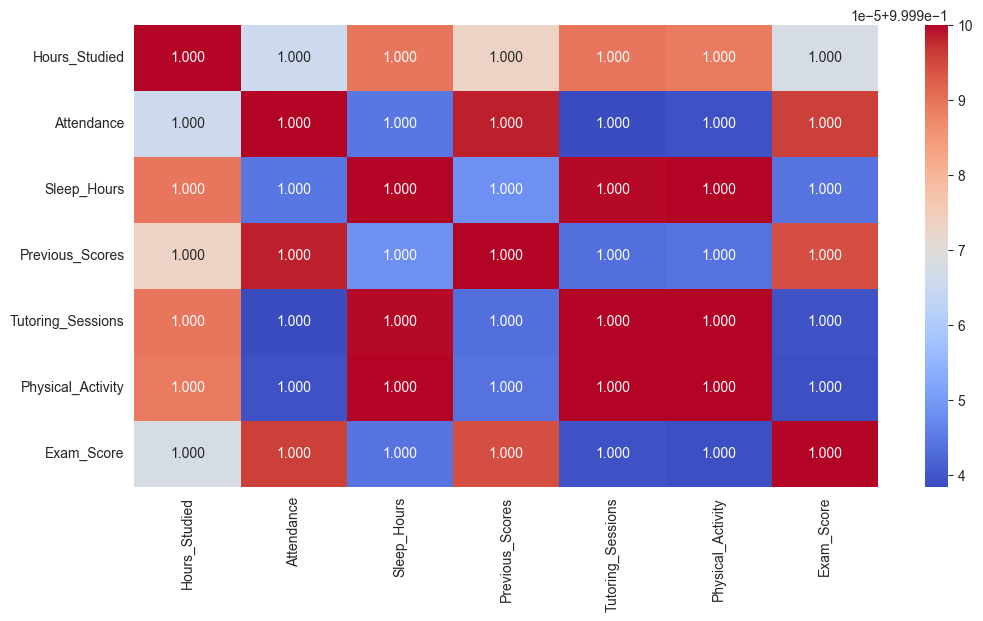

In [118]:
#Corelation matrix of numeric attributes
plt.figure(figsize=(12,6))
sns.heatmap(
    corr,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
)
plt.show()

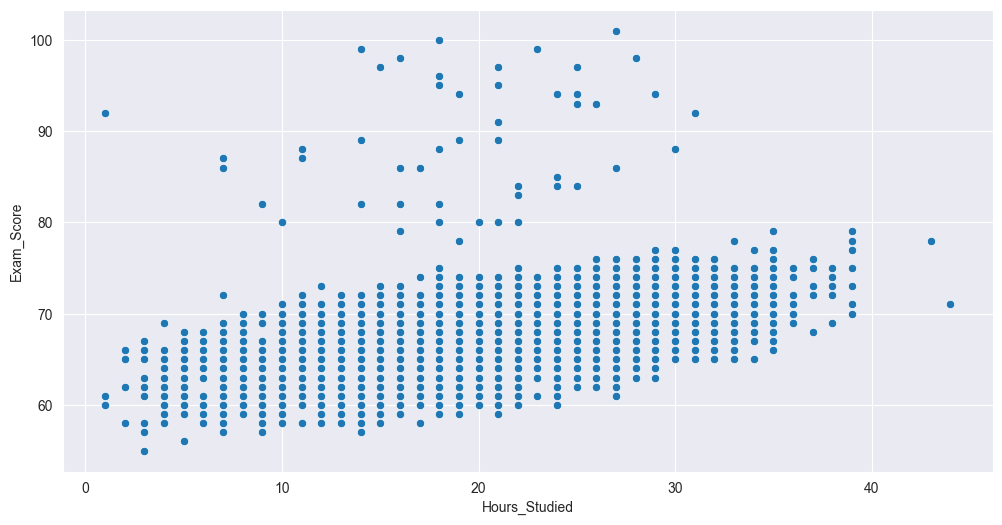

In [119]:
# Scatter Plot

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    y='Exam_Score',
    x='Hours_Studied'
)
plt.show()

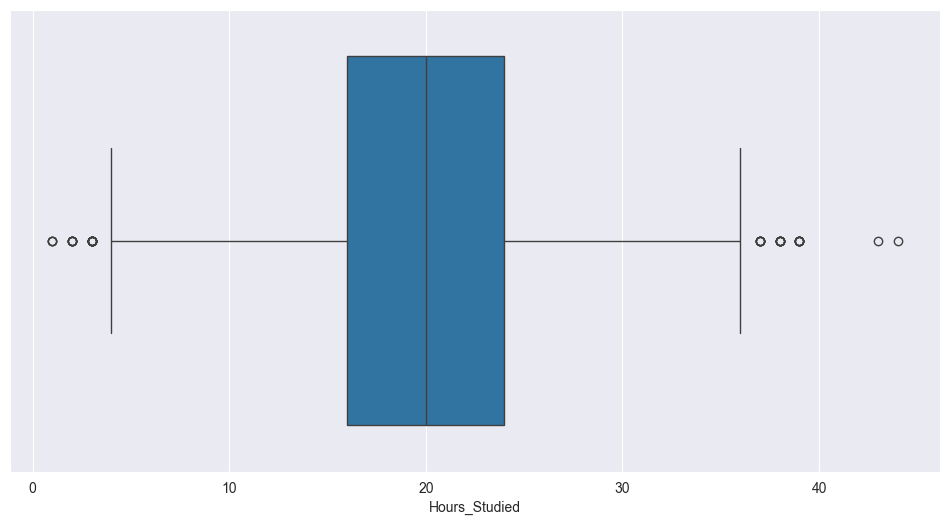

In [120]:
# Detecting and Removing Outliers from Hours_Studied
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='Hours_Studied'
)
plt.show()

In [121]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['Hours_Studied_ss']=ss.fit_transform(df[['Hours_Studied']])

In [122]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Studied_ss
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67.0,0.504942
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61.0,-0.162822
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74.0,0.671882
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71.0,1.506587
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70.0,-0.162822


In [123]:
df['Hours_Studied_ss'].describe().round(2)

count    6607.00
mean       -0.00
std         1.00
min        -3.17
25%        -0.66
50%         0.00
75%         0.67
max         4.01
Name: Hours_Studied_ss, dtype: float64

In [124]:
df.shape

(6607, 21)

In [125]:
df=df[df['Hours_Studied_ss'].between(-3,3)]

In [126]:
df.shape

(6582, 21)

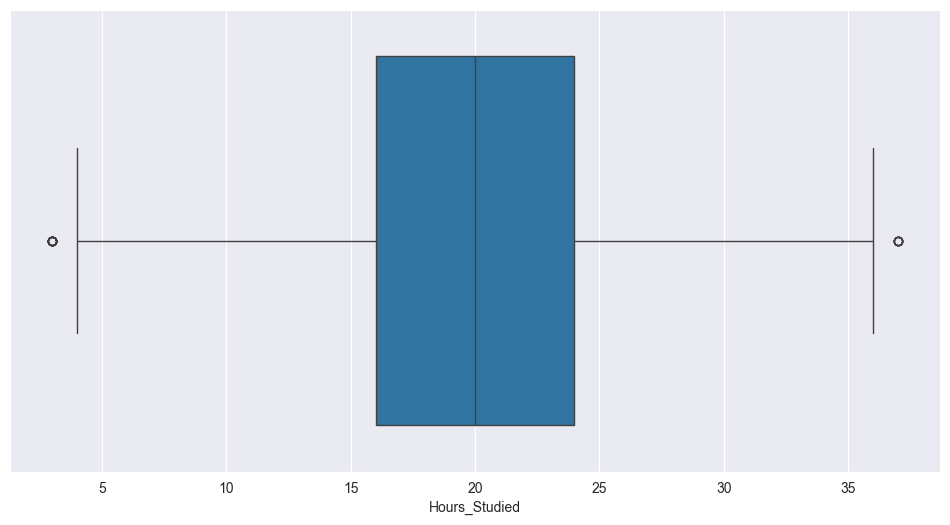

In [127]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='Hours_Studied'
)
plt.show()

In [128]:
x=np.asarray(df['Hours_Studied']).reshape(-1,1)
y=np.asarray(df['Exam_Score'])
type(x), type(y) , x.ndim , y.ndim

(numpy.ndarray, numpy.ndarray, 2, 1)

In [129]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [130]:
x_train=StandardScaler().fit_transform(x_train)


In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

print(f"Coefficients : {lr.coef_[0]}")
print(f"Intercept : {lr.intercept_}")


Coefficients : 1.727616440533971
Intercept : 67.21519468186135


In [132]:
#Results for test dataset
x_test_flat=x_test.ravel()
y_pred=lr.predict(x_test)
df_results=pd.DataFrame(
    {
        "Hours_Studied":x_test_flat,
        "Actual_Score":y_test,
        "Predicted_Score":y_pred
}
)
df_results.head()

,Hours_Studied,Actual_Score,Predicted_Score
0,35,74.0,127.681770
1,25,64.0,110.405606
2,18,62.0,98.312291
3,18,69.0,98.312291
4,23,64.0,106.950373


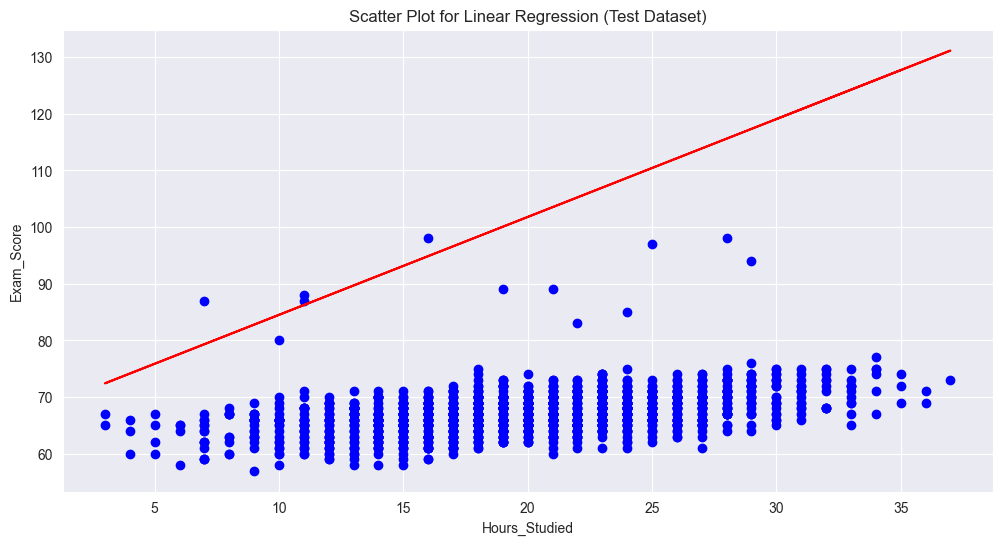

In [133]:
plt.figure(figsize=(12,6))
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,'-r')
plt.title('Scatter Plot for Linear Regression (Test Dataset)')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.show()

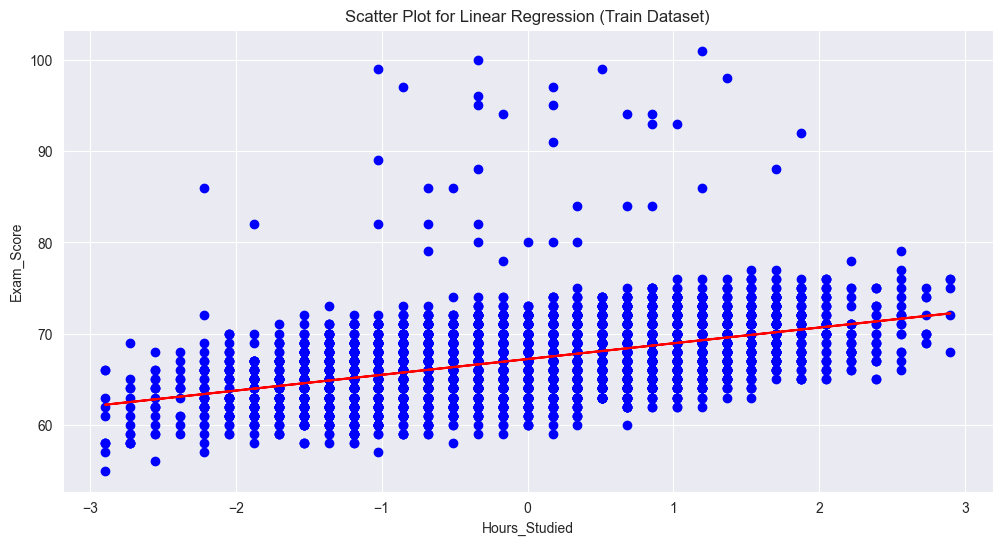

In [134]:
pred_train=lr.predict(x_train)
plt.figure(figsize=(12,6))
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,pred_train,'-r')
plt.title('Scatter Plot for Linear Regression (Train Dataset)')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.show()

## Model Evalulation Metrics

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = lr.predict(x_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 34.17
Mean squared error: 1254.01
Root mean squared error: 35.41
R2-score: -78.64
